# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

## Split Dataset

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((23924, 39, 39), (5982, 39, 39))

## Convert 2D dataset to a 1D vector

In [14]:
batchSize=128
num_classes=8
epochs=10
imageRows, imageCols =39,39

In [15]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [16]:
input_shape

(39, 39, 1)

In [17]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [18]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [20]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [21]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 23924 samples, validate on 5982 samples
Epoch 1/10
23924/23924 [==============================] - 26s 1ms/step - loss: 2.2453 - acc: 0.7491 - val_loss: 1.8825 - val_acc: 0.7907
Epoch 2/10
23924/23924 [==============================] - 21s 882us/step - loss: 1.2171 - acc: 0.9222 - val_loss: 1.1601 - val_acc: 0.8778
Epoch 3/10
23924/23924 [==============================] - 22s 903us/step - loss: 0.8062 - acc: 0.9510 - val_loss: 0.8340 - val_acc: 0.9014
Epoch 4/10
23924/23924 [==============================] - 23s 969us/step - loss: 0.5792 - acc: 0.9649 - val_loss: 0.7084 - val_acc: 0.8975
Epoch 5/10
23924/23924 [==============================] - 22s 935us/step - loss: 0.4481 - acc: 0.9706 - val_loss: 0.7196 - val_acc: 0.8892
Epoch 6/10
23924/23924 [==============================] - 23s 955us/step - loss: 0.3833 - acc: 0.9720 - val_loss: 0.7516 - val_acc: 0.8631
Epoch 7/10
23924/23924 [==============================] - 22s 932us/step - loss: 0.3520 - acc: 0.9725 - val_loss: 0.648

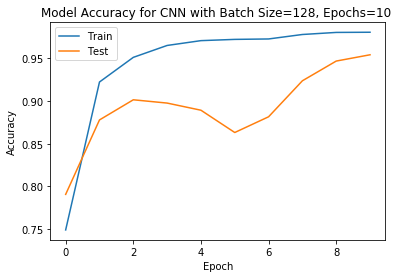

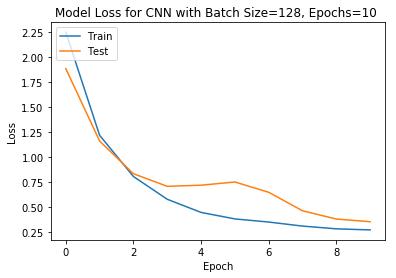

In [22]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [24]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    96.584094   0.063924   0.900421   0.128781   0.523401    1.121711   
Bengali      0.002240  97.466838   0.039245   2.155431   0.001734    0.004498   
Kannada      0.004131   0.022175  99.271744   0.539144   0.002945    0.014976   
Malayalam    0.012320   1.230565   3.103224  93.030149   0.008312    0.037614   
Punjabi      0.070962   0.007767   0.148551   0.001421  99.434215    0.050436   
Rajasthani   0.069025   0.084618   6.311352   1.853210   0.063248   89.320952   
Tamil        0.006499   0.321433   0.613100   0.913351   0.004890    0.022394   
Telugu       0.025226   0.025126   2.515597   1.113636   0.078562    0.392902   

columns         Tamil     Telugu  
rows                              
Assamese     0.224404   0.453750  
Bengali      0.325680   0.004331  
Kannada      0.11

In [25]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    96.879256   0.060983   0.803606   0.078650   0.732672    0.777683   
Bengali      0.003804  92.967522   0.275290   5.991941   0.002636    0.006780   
Kannada      0.011612   0.093276  97.517383   1.883241   0.010384    0.026111   
Malayalam    0.051244   2.929519   5.335516  86.683750   0.050333    0.150886   
Punjabi      0.078672   0.017159   0.416670   0.007081  99.051362    0.162179   
Rajasthani   0.084725   0.177772  11.229236   2.632676   0.098180   82.350761   
Tamil        0.006098   0.765173   0.879826   2.120978   0.004834    0.025525   
Telugu       0.029738   0.090390   2.528574   1.809205   0.137589    0.820034   

columns         Tamil     Telugu  
rows                              
Assamese     0.254855   0.412372  
Bengali      0.744555   0.007497  
Kannada      0.286